# ModelNet10

The ModelNet10 dataset is available from http://modelnet.cs.princeton.edu/

We discovered it throught the helpful Voxel-Based Variational Autoencoders project: https://github.com/ajbrock/Generative-and-Discriminative-Voxel-Modeling

The Princeton website states that this dataset "is provided for the convenience of academic research only."

In [2]:
import env
from data.voxels import plot_voxels, read_voxel_array


# plot things
%matplotlib inline
# autoreload modules
%load_ext autoreload
%autoreload 2

# ModelNet10 Index CSV

Just as with Thingi10k, we've constructed an index file to make access and filtering of the data objects easier.

Unfortunately, it takes quite a bit of time to voxelize all of the objects, and it just so happens that the first category chosen by the script when generating the voxels was toilets.

In [20]:
from data import MODELNET10_TOILET_INDEX
import pandas as pd

In [5]:
pd.read_csv(MODELNET10_TOILET_INDEX)

,category,dataset,model,binvox,dimension,x_rotations,z_rotations
0,toilet,test,toilet_0378.off,toilet_0378_32_x0_z0.binvox,32,0,0
1,toilet,test,toilet_0378.off,toilet_0378_32_x0_z1.binvox,32,0,1
2,toilet,test,toilet_0378.off,toilet_0378_32_x0_z2.binvox,32,0,2
3,toilet,test,toilet_0378.off,toilet_0378_32_x0_z3.binvox,32,0,3
4,toilet,test,toilet_0378.off,toilet_0378_32_x1_z0.binvox,32,1,0
5,toilet,test,toilet_0378.off,toilet_0378_32_x1_z1.binvox,32,1,1
6,toilet,test,toilet_0378.off,toilet_0378_32_x1_z2.binvox,32,1,2
7,toilet,test,toilet_0378.off,toilet_0378_32_x1_z3.binvox,32,1,3
8,toilet,test,toilet_0378.off,toilet_0378_32_x2_z0.binvox,32,2,0
9,toilet,test,toilet_0378.off,toilet_0378_32_x2_z1.binvox,32,2,1


# ModelNet10 Dataset Class & Generator

Just as with Thingi10k, we have a class designed to make working with ModelNet10 easier. It has some of the same filtering functions, as well as a generator to retrieve voxel shapes.

In [7]:
from data.modelnet10 import ModelNet10
ModelNet = ModelNet10.initFromIndex(MODELNET10_TOILET_INDEX)
len(ModelNet)

7104

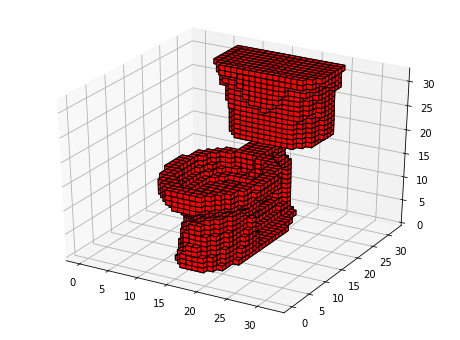

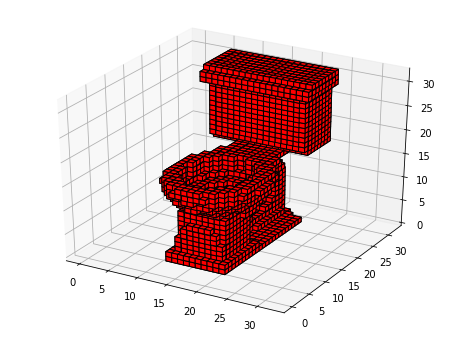

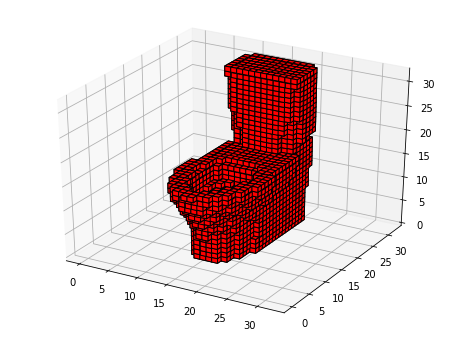

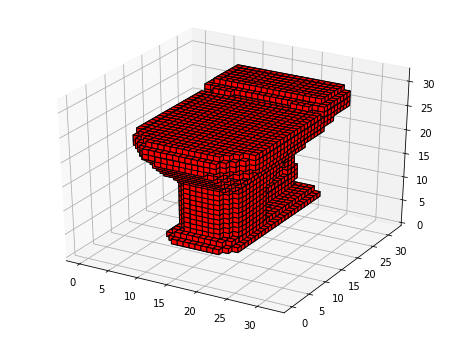

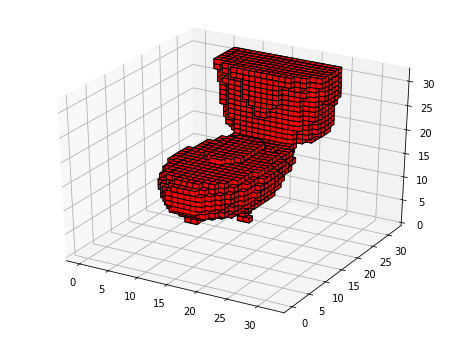

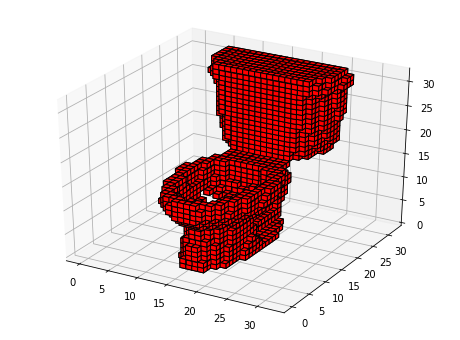

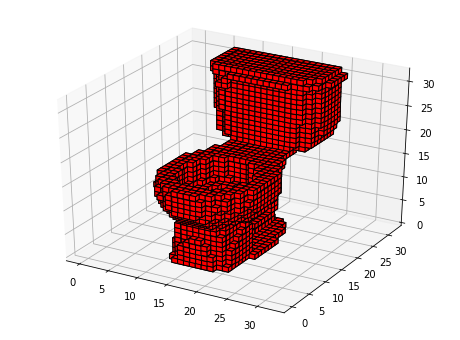

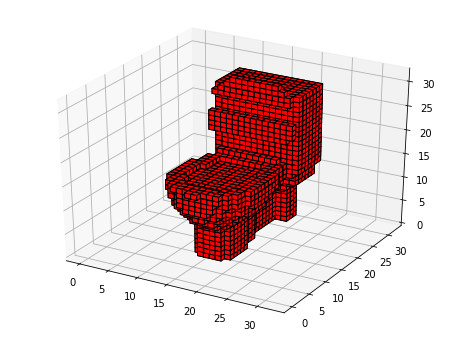

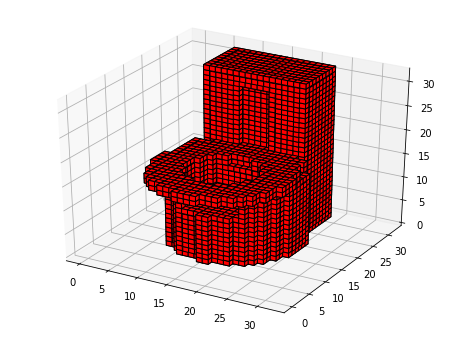

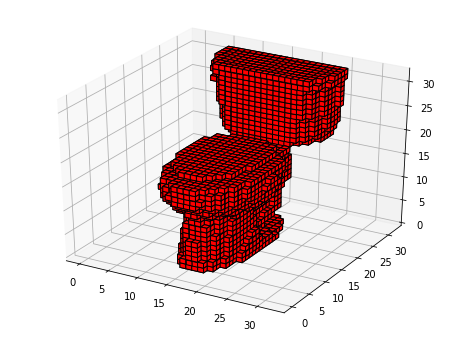

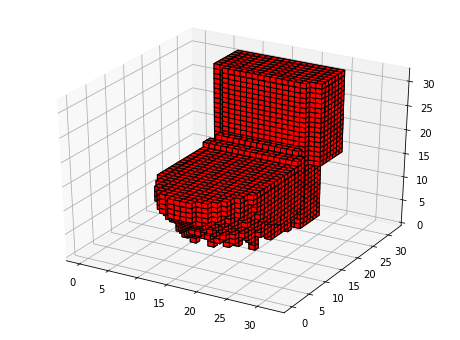

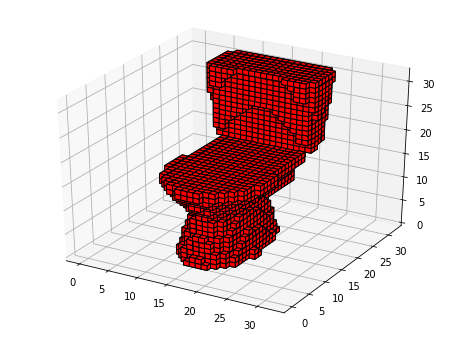

In [18]:
for i, batch in enumerate(ModelNet.voxels_batchmaker(batch_size=64)):
    if i % 10 == 0:
        plot_voxels(batch[0])

# Visualization and Voxelized Object Rotation

We convert ModelNet10 .off files into .binvox files and, for each, rotate the object around the x and z axes to produce 16 total representations.

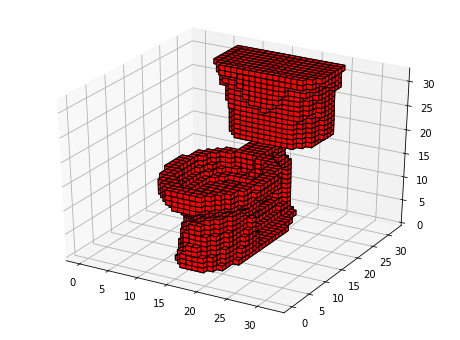

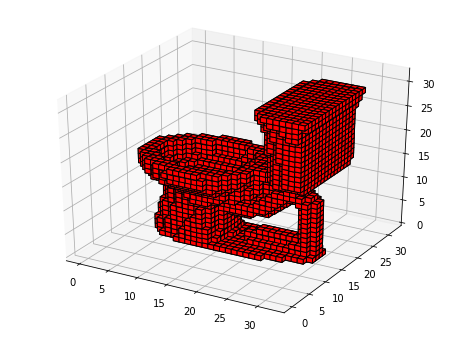

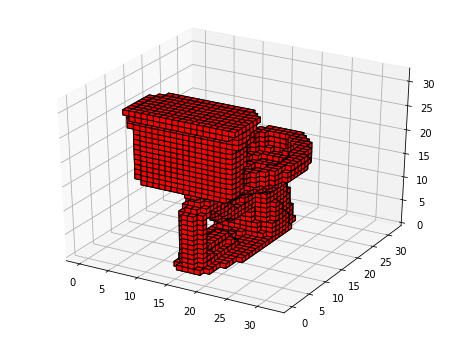

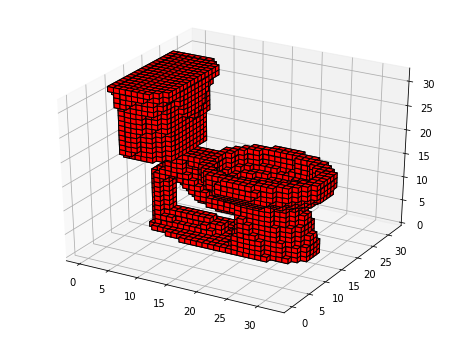

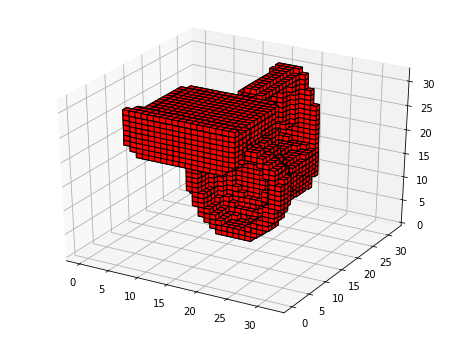

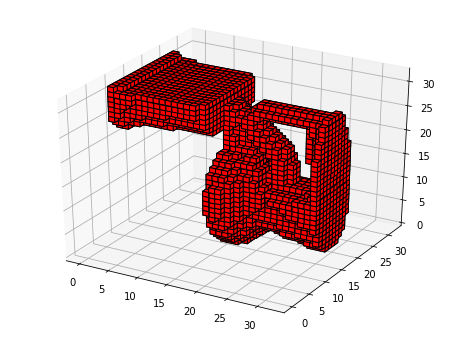

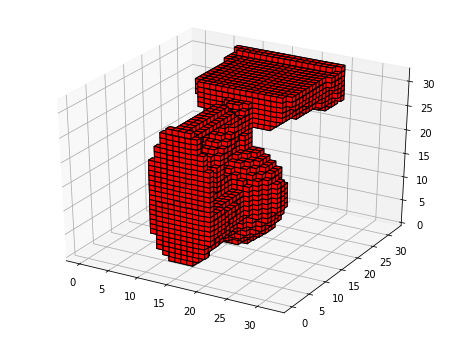

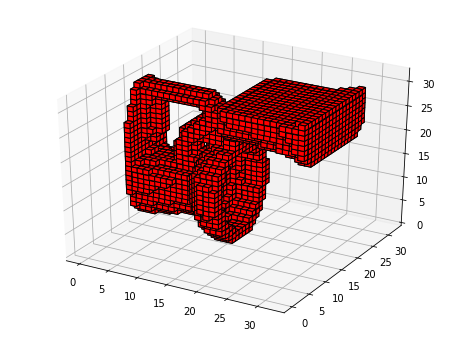

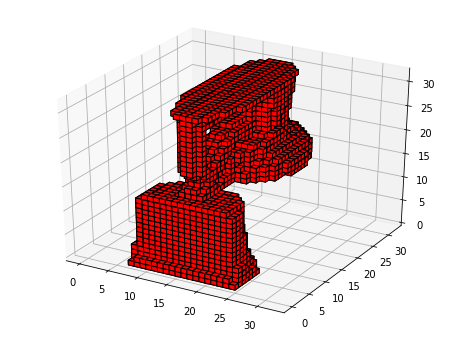

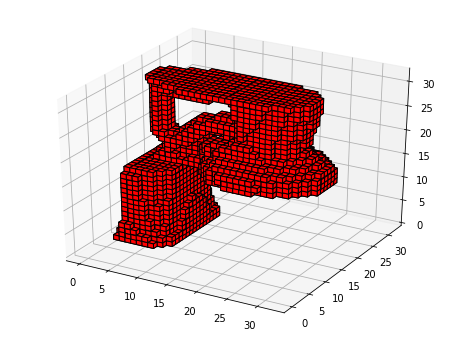

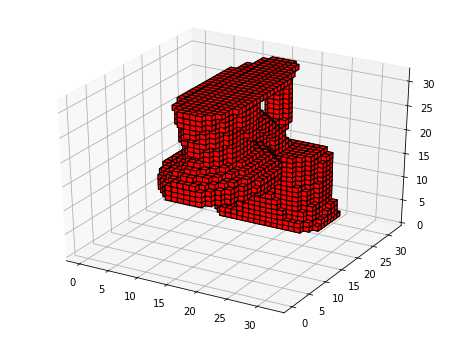

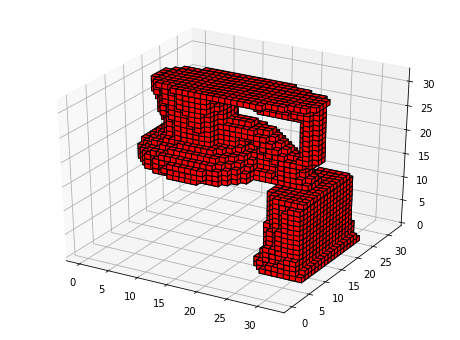

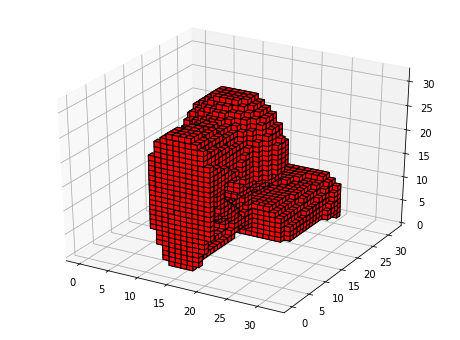

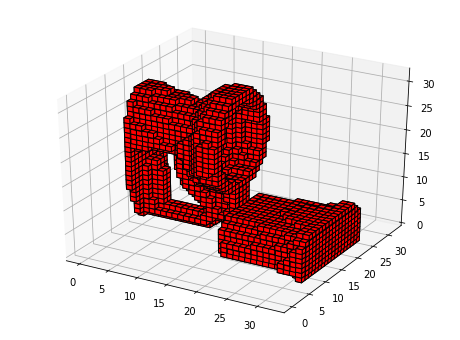

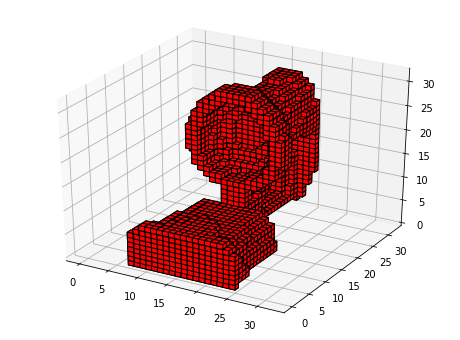

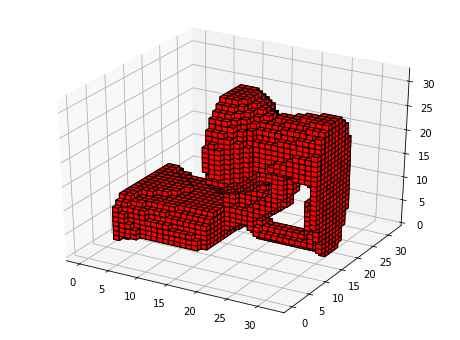

In [20]:
for x in range(4):
    for z in range(4):
        test = '/home/jcworkma/jack/3d-form/src/../data/external/ModelNet10/toilet/test/toilet_0378_32_x{}_z{}.binvox'.format(x, z)
        voxels = read_voxel_array(test)
        plot_voxels(voxels.data)

# Combining ModelNet10 Index Files


In [27]:
from data import MODELNET10_SOFA_INDEX, MODELNET10_SOFA_TOILET_INDEX
index1 = MODELNET10_SOFA_INDEX
index2 = MODELNET10_TOILET_INDEX
df1 = pd.read_csv(index1)
df2 = pd.read_csv(index2)
df3 = df1.append(df2)
df3.to_csv(MODELNET10_SOFA_TOILET_INDEX, index=False)

In [28]:
pd.read_csv(MODELNET10_SOFA_TOILET_INDEX)

,category,dataset,model,binvox,dimension,x_rotations,z_rotations
0,sofa,test,sofa_0742.off,sofa_0742_32_x0_z0.binvox,32,0,0
1,sofa,test,sofa_0742.off,sofa_0742_32_x0_z1.binvox,32,0,1
2,sofa,test,sofa_0742.off,sofa_0742_32_x0_z2.binvox,32,0,2
3,sofa,test,sofa_0742.off,sofa_0742_32_x0_z3.binvox,32,0,3
4,sofa,test,sofa_0742.off,sofa_0742_32_x1_z0.binvox,32,1,0
5,sofa,test,sofa_0742.off,sofa_0742_32_x1_z1.binvox,32,1,1
6,sofa,test,sofa_0742.off,sofa_0742_32_x1_z2.binvox,32,1,2
7,sofa,test,sofa_0742.off,sofa_0742_32_x1_z3.binvox,32,1,3
8,sofa,test,sofa_0742.off,sofa_0742_32_x2_z0.binvox,32,2,0
9,sofa,test,sofa_0742.off,sofa_0742_32_x2_z1.binvox,32,2,1


# Filtering Index File By Category

In [6]:
import env
from data import MODELNET10_INDEX
from data.modelnet10 import ModelNet10
ModelNet = ModelNet10.initFromIndex(MODELNET10_INDEX)
len(ModelNet)

78368

In [12]:
toilets = len(ModelNet.df[ModelNet.df.category == 'toilet'])
bathtubs = len(ModelNet.df[ModelNet.df.category == 'bathtub'])
print('num toilets = ', toilets)
print('num bathtubs = ', bathtubs)
toilets + bathtubs

num toilets =  7104
num bathtubs =  2496


9600

In [17]:
train_toilets = len(ModelNet.df[(ModelNet.df.category == 'toilet') & (ModelNet.df.dataset == 'train')])
print('train_toilets=', train_toilets)
test_toilets = len(ModelNet.df[(ModelNet.df.category == 'toilet') & (ModelNet.df.dataset == 'test')])
print('test_toilets=', test_toilets)
train_bathtubs = len(ModelNet.df[(ModelNet.df.category == 'bathtub') & (ModelNet.df.dataset == 'train')])
print('train_bathtubs=', train_bathtubs)
test_bathtubs = len(ModelNet.df[(ModelNet.df.category == 'bathtub') & (ModelNet.df.dataset == 'test')])
print('test_bathtubs=', test_bathtubs)
print()
print('train=', train_toilets + train_bathtubs)
print('test=', test_toilets + test_bathtubs)

train_toilets= 5504
test_toilets= 1600
train_bathtubs= 1696
test_bathtubs= 800

train= 7200
test= 2400


In [7]:
ModelNet.filter_categories(['bathtub', 'toilet'])
len(ModelNet)

9600

## 64 Dim ModelNet10 Voxels

A slight tweak was made to the modelnet10 voxel conversion code to support extra dims like 64x64x64. We show what that looks like here.

<module 'matplotlib.pyplot' from '/home/jcworkma/jack/3d-form/.3d-form/lib/python3.5/site-packages/matplotlib/pyplot.py'>

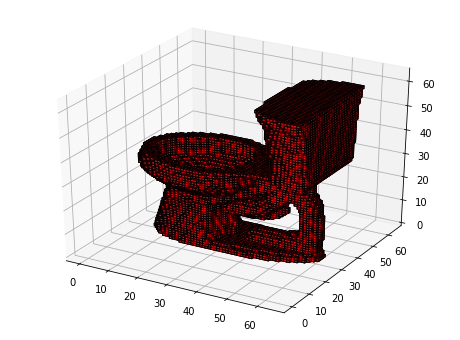

In [4]:
dim64voxel = '/home/jcworkma/jack/3d-form/src/../data/external/ModelNet10/toilet/test/toilet_0378_64_x0_z1.binvox'
vox_data = read_voxel_array(dim64voxel).data
plot_voxels(vox_data)